# A)Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

In [2309]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('air_conditioner_prices_dataset.csv')
data.head()

,Brand,Capacity (BTUs),EER/SEER,Type,Features,Location,Age (years),Price ($)
0,Brand A,18000,14.6,Portable,Quiet,India,3,239
1,Brand C,8000,12.3,Portable,WiFi,USA,4,348
2,Brand B,15000,12.4,Window,WiFi,Europe,4,325
3,Brand C,18000,15.6,Split,Standard,Australia,4,480
4,Brand C,12000,17.5,Portable,"Inverter Technology, WiFi",Australia,2,881


## Below I have used .info(), .describe(), and .head() for inspecting the structure of the dataset. data.shape gives the number of rows and columns

In [2312]:
data.shape

(200, 8)

In [2314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            200 non-null    object 
 1   Capacity (BTUs)  200 non-null    int64  
 2   EER/SEER         200 non-null    float64
 3   Type             200 non-null    object 
 4   Features         200 non-null    object 
 5   Location         200 non-null    object 
 6   Age (years)      200 non-null    int64  
 7   Price ($)        200 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 12.6+ KB


In [2316]:
data.describe()

,Capacity (BTUs),EER/SEER,Age (years),Price ($)
count,200.000000,200.000000,200.000000,200.000000
mean,12305.000000,16.112500,2.360000,604.850000
std,3507.633456,2.386687,1.129949,222.109931
min,8000.000000,12.000000,1.000000,203.000000
25%,10000.000000,13.850000,1.000000,435.500000
50%,12000.000000,16.400000,2.000000,592.500000
75%,15000.000000,18.050000,3.000000,802.500000
max,18000.000000,20.000000,4.000000,998.000000


In [2318]:
data.dtypes

Brand               object
Capacity (BTUs)      int64
EER/SEER           float64
Type                object
Features            object
Location            object
Age (years)          int64
Price ($)            int64
dtype: object

# B) Visualization and Statistical Values

<Figure size 1500x1000 with 0 Axes>

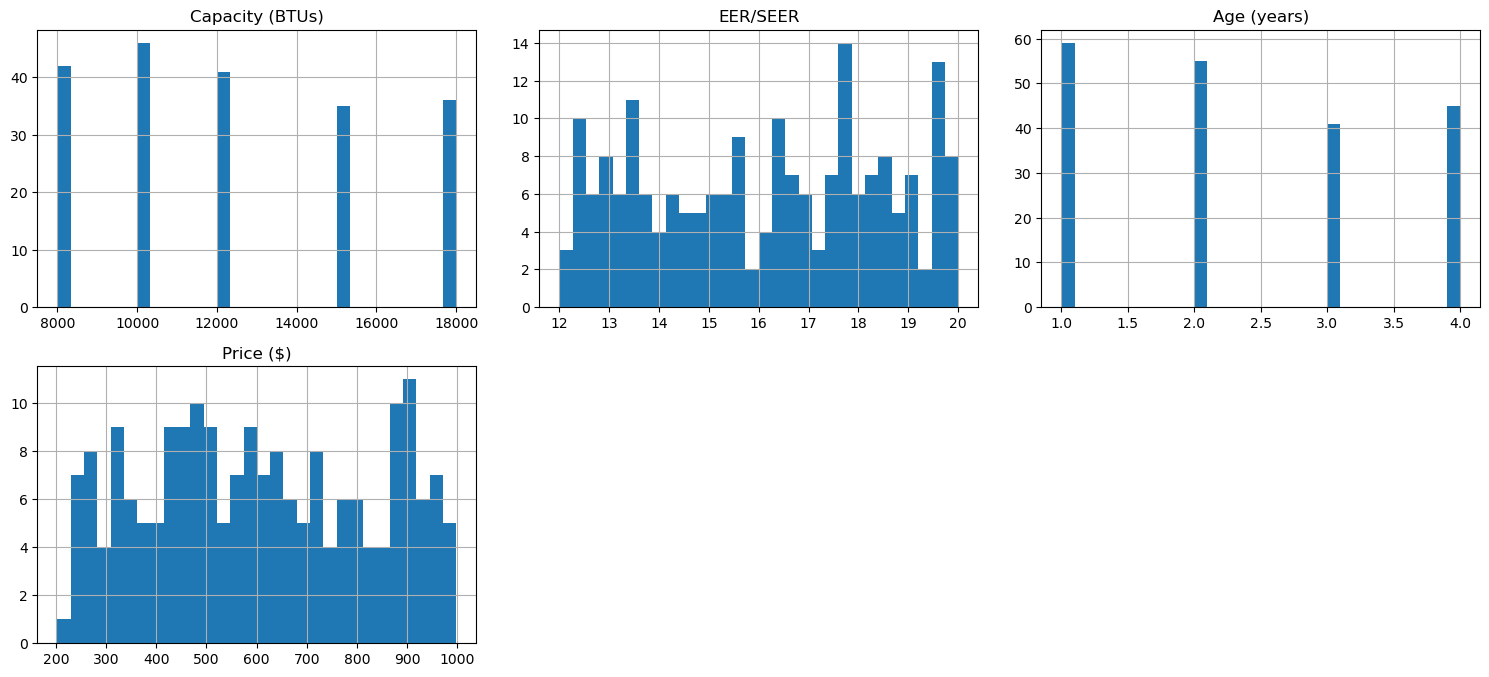

In [2321]:
plt.figure(figsize=(15, 10))
data.hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

In [2322]:
continuous = ['Capacity (BTUs)', 'EER/SEER', 'Age (years)', 'Price ($)']
data[continuous].describe()

,Capacity (BTUs),EER/SEER,Age (years),Price ($)
count,200.000000,200.000000,200.000000,200.000000
mean,12305.000000,16.112500,2.360000,604.850000
std,3507.633456,2.386687,1.129949,222.109931
min,8000.000000,12.000000,1.000000,203.000000
25%,10000.000000,13.850000,1.000000,435.500000
50%,12000.000000,16.400000,2.000000,592.500000
75%,15000.000000,18.050000,3.000000,802.500000
max,18000.000000,20.000000,4.000000,998.000000


### Histogram for continuous features for the distribution

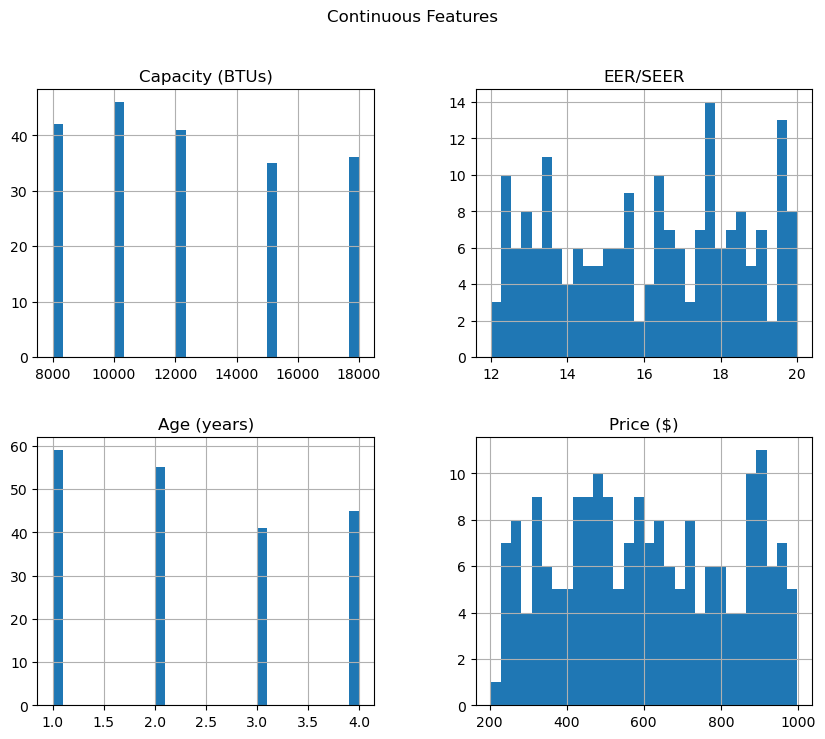

In [2324]:
data[continuous].hist(bins=30,figsize=(10, 8))
plt.suptitle("Continuous Features")
plt.show()

### checking for missing values and outliers as they require special treatment because they can skew the results of statistical analyses and models.But there aren't any outliers or missing values here

In [2326]:
missing_val = data.isna().sum()
print("Missing values:\n", missing_val)

Missing values:
 Brand              0
Capacity (BTUs)    0
EER/SEER           0
Type               0
Features           0
Location           0
Age (years)        0
Price ($)          0
dtype: int64


In [2327]:
data.drop('Features', axis=1, inplace=True)

### Here I have used label encoding to convert categorical variables into numeric form

In [2331]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Brand'] = le.fit_transform(data['Brand'])
data['Type'] = le.fit_transform(data['Type'])
#data['Features'] = le.fit_transform(data['Features'])
data['Location'] = le.fit_transform(data['Location'])

In [2336]:
data.dtypes

Brand                int32
Capacity (BTUs)      int64
EER/SEER           float64
Type                 int32
Location             int32
Age (years)          int64
Price ($)            int64
dtype: object

In [2338]:
continuous_cols = data.select_dtypes(include=['float64', 'int64','int32']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print("\nContinuous columns:")
print(continuous_cols)
print("\nCategorical columns:")
print(categorical_cols)


Continuous columns:
Index(['Brand', 'Capacity (BTUs)', 'EER/SEER', 'Type', 'Location',
       'Age (years)', 'Price ($)'],
      dtype='object')

Categorical columns:
Index([], dtype='object')


In [2340]:
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return len(outliers)

print("\nNumber of outliers:")
for col in continuous_cols:
    print(f"{col}: {detect_outliers(data, col)}")


Number of outliers:
Brand: 0
Capacity (BTUs): 0
EER/SEER: 0
Type: 0
Location: 0
Age (years): 0
Price ($): 0


# C)Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

## The Pearson Correlation Coefficient (PCC), also known as Pearson's r, is a statistical measure that quantifies the strength and direction of the linear relationship between two continuous variables. It ranges from -1 to 1, where: 
### 1 indicates a perfect positive linear correlation: as one variable increases, the other also increases proportionall .
### 
-1 indicates a perfect negative linear correlation: as one variable increases, the other decreases proportiona and 
y### 
0 indicates no linear correlation: changes in one variable do not predict changes in the other.

In [2421]:
correlation=data.corr(method='pearson',numeric_only=True)
print(correlation)

                       Brand  Capacity (BTUs)  EER/SEER      Type  Location  \
Brand               1.000000        -0.046085  0.047168 -0.132453  0.151537   
Capacity (BTUs)    -0.046085         1.000000  0.117313 -0.043671  0.049469   
EER/SEER            0.047168         0.117313  1.000000  0.031036 -0.087108   
Type               -0.132453        -0.043671  0.031036  1.000000 -0.090528   
Location            0.151537         0.049469 -0.087108 -0.090528  1.000000   
Age (years)         0.082480         0.006390  0.056646 -0.057758 -0.037084   
Price ($)          -0.087198        -0.124492 -0.005136  0.044366 -0.047260   
Age_squared         0.086444         0.023644  0.031724 -0.032498 -0.042842   
Capacity_per_price  0.008040         0.602602  0.051422 -0.056242  0.019529   

                    Age (years)  Price ($)  Age_squared  Capacity_per_price  
Brand                  0.082480  -0.087198     0.086444            0.008040  
Capacity (BTUs)        0.006390  -0.124492     0.0236

## Following is the visualisation of the Correlation Matrix using heatmap

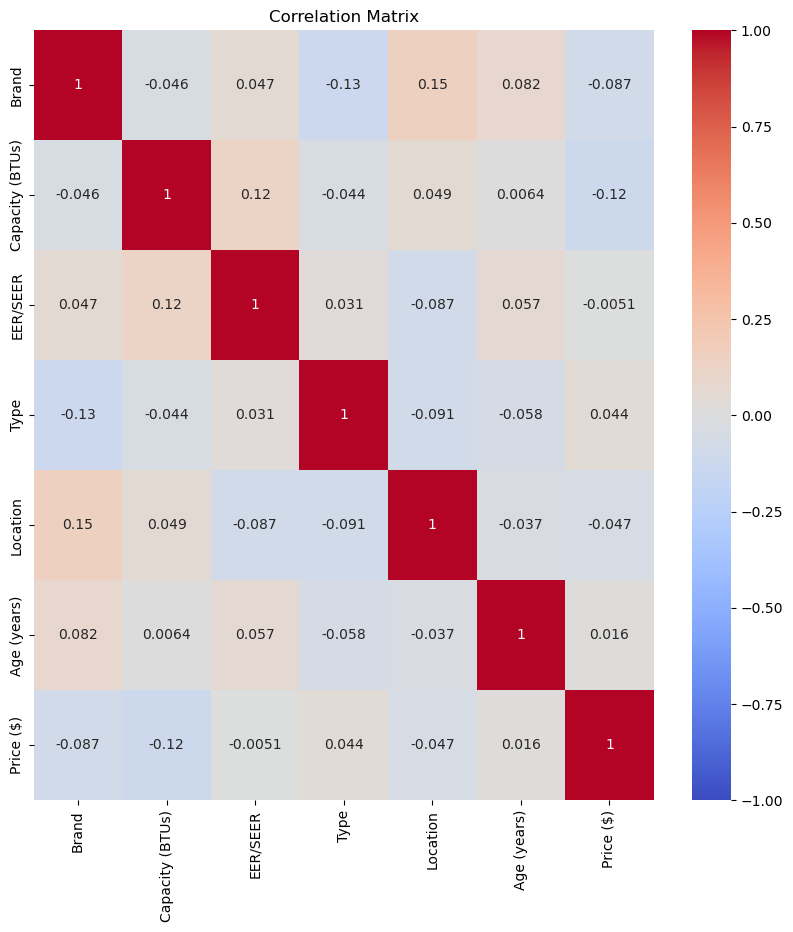

In [2346]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Scatter plot for relationships between features

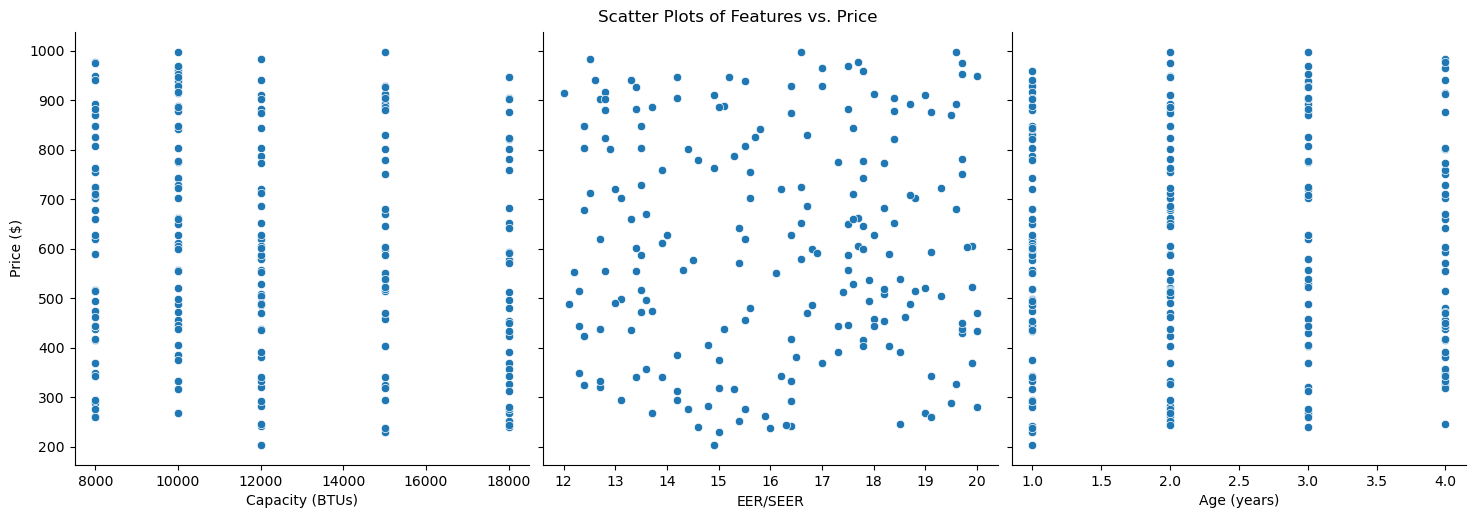

In [2349]:
sns.pairplot(data, 
             x_vars=['Capacity (BTUs)', 'EER/SEER', 'Age (years)'], 
             y_vars='Price ($)', height=5)
plt.suptitle('Scatter Plots of Features vs. Price', y=1.02)
plt.show()

### Here I have performed Log Transformation on Price($) column for feature engineering and preparing the data for modelling

In [2352]:
data['Age_squared'] = data['Age (years)'] ** 2
data['Capacity_per_price'] = data['Capacity (BTUs)'] / data['Price ($)']

In [2354]:
X = data.drop('Price ($)', axis=1)
y = data['Price ($)']

In [2356]:
y = np.log1p(y)

# D)Select 25% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset

In [2359]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

## I have split the dataset into training (75%) and test (25%) sets using train_test_split. This helps us evaluate model performance on unseen data, preventing overfitting. Also I have verified using .describe()

In [2362]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [2364]:
X_train

,Brand,Capacity (BTUs),EER/SEER,Type,Location,Age (years),Age_squared,Capacity_per_price
114,1,10000,15.0,0,3,2,4,11.286682
173,2,10000,12.8,0,3,4,16,18.018018
5,2,8000,12.4,1,1,2,4,11.799410
126,0,12000,14.9,2,2,1,1,59.113300
117,1,8000,13.3,2,0,1,1,8.510638
...,...,...,...,...,...,...,...,...
106,0,8000,18.7,0,0,3,9,11.299435
14,2,8000,19.5,1,3,1,1,27.777778
92,0,8000,17.3,2,2,4,16,18.058691
179,1,15000,17.8,0,0,2,4,37.128713


In [2366]:
data.head()

,Brand,Capacity (BTUs),EER/SEER,Type,Location,Age (years),Price ($),Age_squared,Capacity_per_price
0,0,18000,14.6,0,2,3,239,9,75.313808
1,2,8000,12.3,0,3,4,348,16,22.988506
2,1,15000,12.4,2,1,4,325,16,46.153846
3,2,18000,15.6,1,0,4,480,16,37.500000
4,2,12000,17.5,0,0,2,881,4,13.620885


## Standard scaling is done using StandardScaler to ensure that all features have the same scale.

In [2369]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2371]:
X_train_scaled

array([[ 0.03987261, -0.66247112, -0.48113211, ..., -0.39996614,
        -0.56705757, -0.90325827],
       [ 1.23605095, -0.66247112, -1.39414875, ...,  1.39092704,
         1.53748599, -0.44546766],
       [ 1.23605095, -1.2084638 , -1.56015178, ..., -0.39996614,
        -0.56705757, -0.86838819],
       ...,
       [-1.15630572, -1.2084638 ,  0.4733853 , ...,  1.39092704,
         1.53748599, -0.44270155],
       [ 0.03987261,  0.70251058,  0.68088908, ..., -0.39996614,
        -0.56705757,  0.8542292 ],
       [ 0.03987261,  0.70251058,  0.7638906 , ...,  0.49548045,
         0.30983558,  0.55651211]])

# E) Train a Linear Regression model using the training data with three-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try three values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.

### Ridge regression adds a penalty equal to the square of the magnitude of coefficients to the loss function. This penalty term is known as the L2 norm.It is also called as L2 Regularization

### Lasso regression adds a penalty equal to the absolute value of the magnitude of coefficients to the loss function. This penalty term is known as the L1 norm.It is also called as L1 Regularization

### Elastic Net combines both Ridge and Lasso penalties. It includes both L1 and L2 norms in its loss function.

In [2374]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet Regression': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

Linear Regression Cross-Validation MSE: 0.028346982094958856
Linear Regression Test MSE: 0.021267059386230344
Ridge Regression Cross-Validation MSE: 0.027721950498786074
Ridge Regression Test MSE: 0.02082324425542907
Lasso Regression Cross-Validation MSE: 0.06943702102666792
Lasso Regression Test MSE: 0.07557686634051297
ElasticNet Regression Cross-Validation MSE: 0.044174335750405046
ElasticNet Regression Test MSE: 0.04709918605300053
Normal Equation Test MSE: 0.02126705938622978


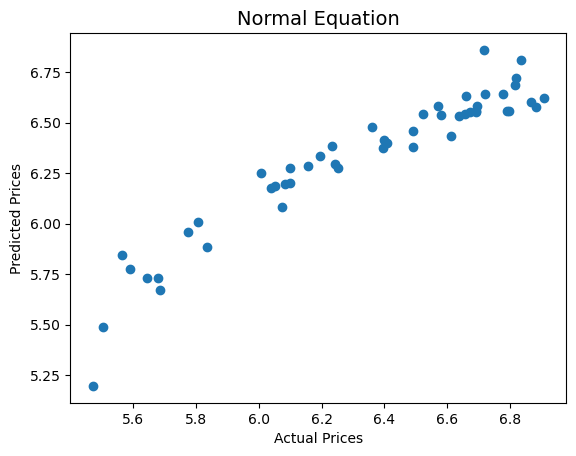

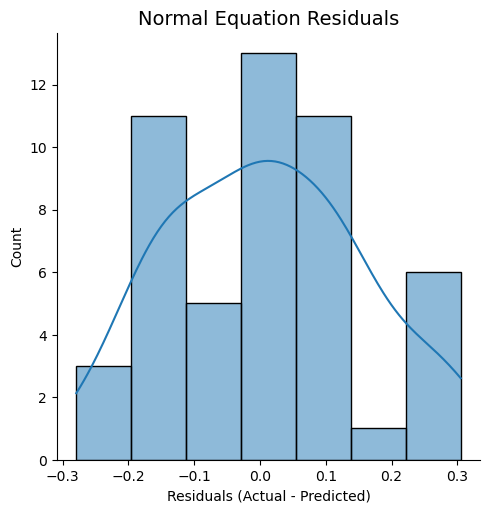

In [2376]:
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    print(f"{name} Cross-Validation MSE: {abs(np.mean(scores))}")

    model.fit(X_train_scaled, y_train)
    ypred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, ypred)
    print(f"{name} Test MSE: {mse}")

X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]  # Add intercept
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

y_pred_normal_eq = X_test_b.dot(theta_best)

mse_normal_eq = mean_squared_error(y_test, y_pred_normal_eq)
print(f"Normal Equation Test MSE: {mse_normal_eq}")

plt.scatter(y_test, y_pred_normal_eq)
plt.title('Normal Equation', fontsize=14)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

sns.displot((y_test - y_pred_normal_eq), kde=True)
plt.title('Normal Equation Residuals', fontsize=14)
plt.xlabel('Residuals (Actual - Predicted)')
plt.show()

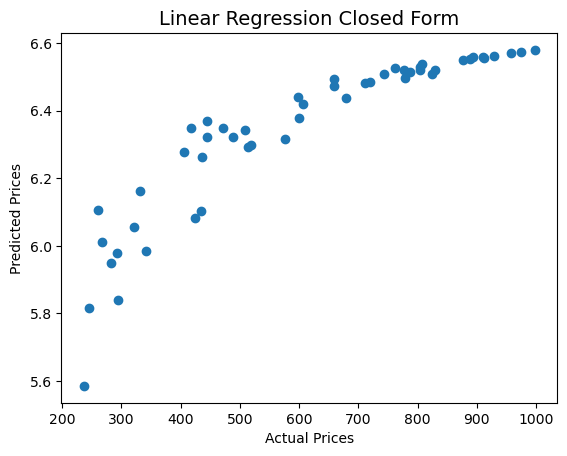

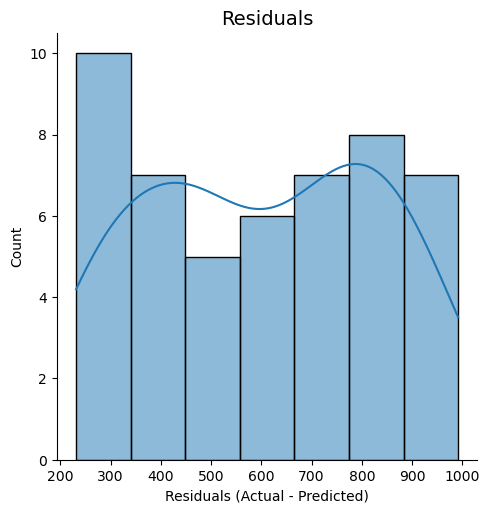

In [2378]:
plt.scatter(ytest, ypred)
plt.title('Linear Regression Closed Form', fontsize=14)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

sns.displot((ytest - ypred), kde=True)
plt.title('Residuals', fontsize=14)
plt.xlabel('Residuals (Actual - Predicted)')
plt.show()

In [2380]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', alpha=0.1)
train_losses_sgd = []
val_losses_sgd = []

for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    sgd.fit(X_train_fold, y_train_fold)
    
    y_train_pred_sgd = sgd.predict(X_train_fold)
    y_val_pred_sgd = sgd.predict(X_val_fold)

    train_loss_sgd = mean_squared_error(y_train_fold, y_train_pred_sgd)
    val_loss_sgd = mean_squared_error(y_val_fold, y_val_pred_sgd)

    train_losses_sgd.append(train_loss_sgd)
    val_losses_sgd.append(val_loss_sgd)

print(f"SGD Ridge Regression Average Training MSE: {np.mean(train_losses_sgd)}")
print(f"SGD Ridge Regression Average Validation MSE: {np.mean(val_losses_sgd)}")

SGD Ridge Regression Average Training MSE: 0.028361703914559017
SGD Ridge Regression Average Validation MSE: 0.0397796509371697


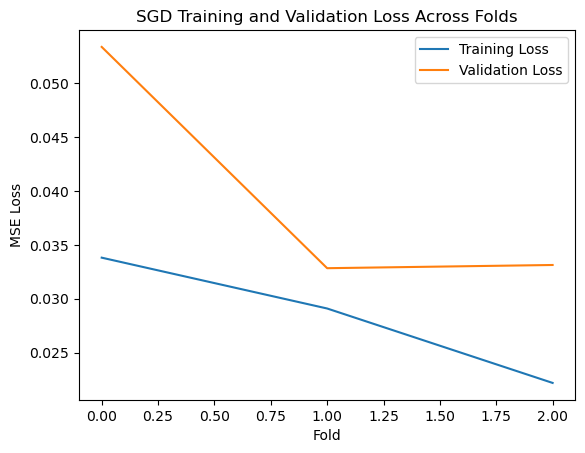

In [2382]:
plt.plot(train_losses_sgd, label='Training Loss')
plt.plot(val_losses_sgd, label='Validation Loss')
plt.xlabel('Fold')
plt.ylabel('MSE Loss')
plt.title('SGD Training and Validation Loss Across Folds')
plt.legend()
plt.show()

In [2384]:
models = {
    'Ridge Regression': Ridge(alpha=1),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet Regression': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    print(f"{name} Cross-Validation MSE: {-np.mean(scores)}")
    
    model.fit(X_train_scaled, y_train)
    ypred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, ypred)
    print(f"{name} Test MSE: {mse}")


Ridge Regression Cross-Validation MSE: 0.027721950498786074
Ridge Regression Test MSE: 0.02082324425542907
Lasso Regression Cross-Validation MSE: 0.06943702102666792
Lasso Regression Test MSE: 0.07557686634051297
ElasticNet Regression Cross-Validation MSE: 0.044174335750405046
ElasticNet Regression Test MSE: 0.04709918605300053


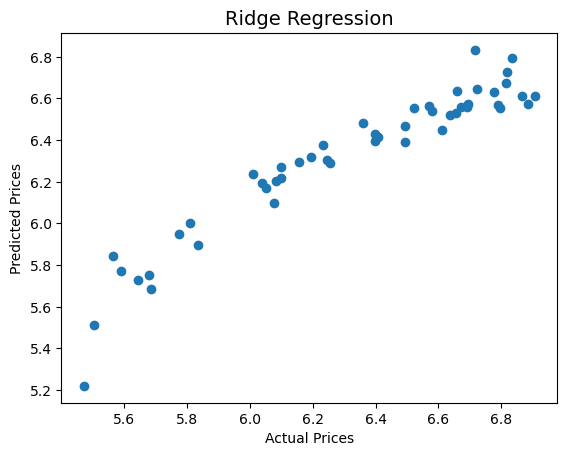

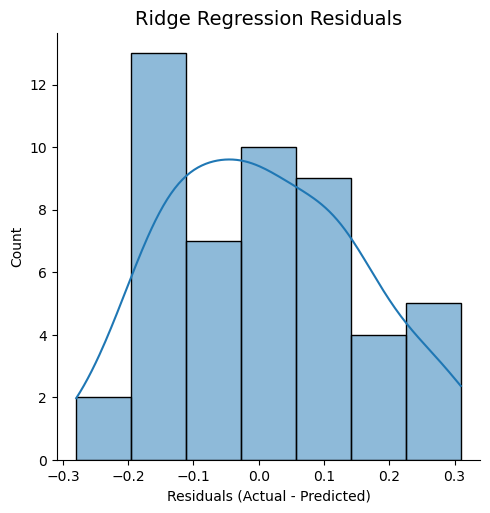

In [2386]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train_scaled, y_train)
ypred_ridge = ridge_reg.predict(X_test_scaled)

plt.scatter(y_test, ypred_ridge)
plt.title('Ridge Regression', fontsize=14)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

sns.displot((y_test - ypred_ridge), kde=True)
plt.title('Ridge Regression Residuals', fontsize=14)
plt.xlabel('Residuals (Actual - Predicted)')
plt.show()

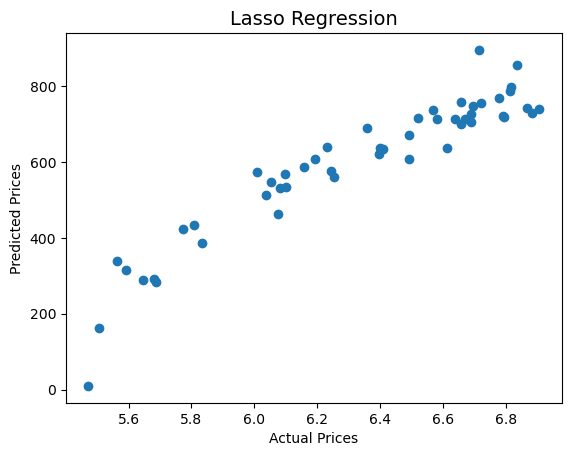

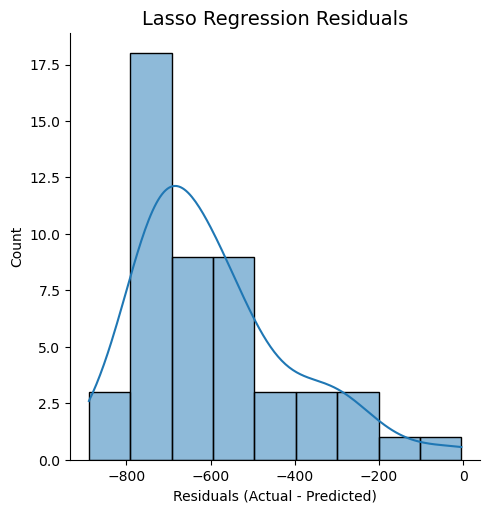

In [2387]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, ytrain)
ypred_lasso = lasso_reg.predict(X_test_scaled)

plt.scatter(y_test, ypred_lasso)
plt.title('Lasso Regression', fontsize=14)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

sns.displot((y_test - ypred_lasso), kde=True)
plt.title('Lasso Regression Residuals', fontsize=14)
plt.xlabel('Residuals (Actual - Predicted)')
plt.show()

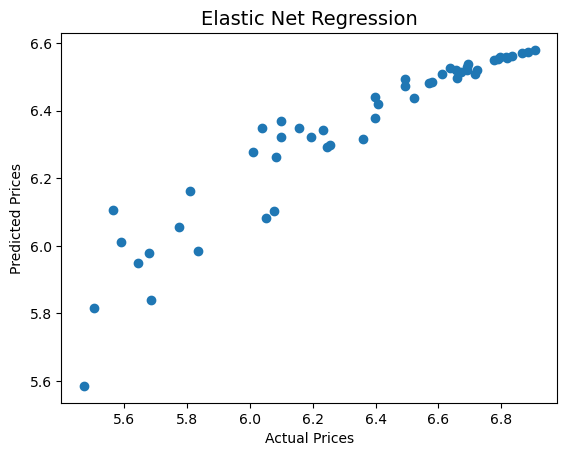

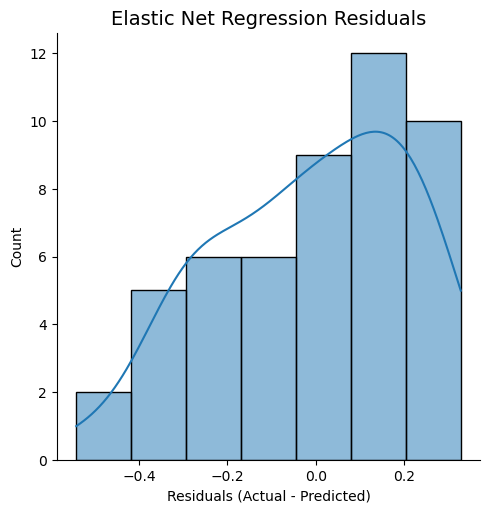

In [2388]:
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_reg.fit(X_train_scaled, y_train)
ypred_elastic = elastic_net_reg.predict(X_test_scaled)

plt.scatter(y_test, ypred_elastic)
plt.title('Elastic Net Regression', fontsize=14)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

sns.displot((y_test - ypred_elastic), kde=True)
plt.title('Elastic Net Regression Residuals', fontsize=14)
plt.xlabel('Residuals (Actual - Predicted)')
plt.show()

SGD with l2 penalty and learning rate 0.01 Test MSE: 0.028551611653590773


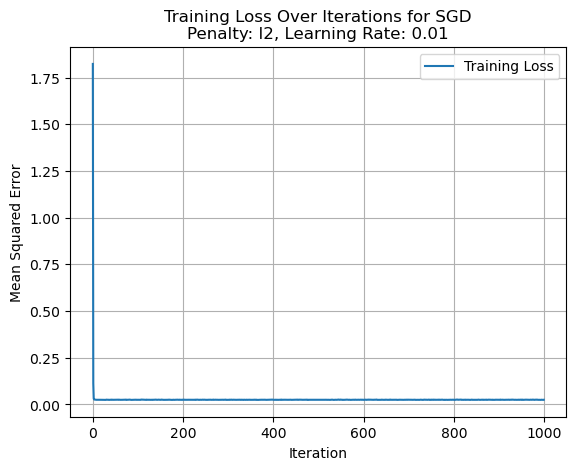

SGD with l2 penalty and learning rate 0.1 Test MSE: 0.03329237936804568


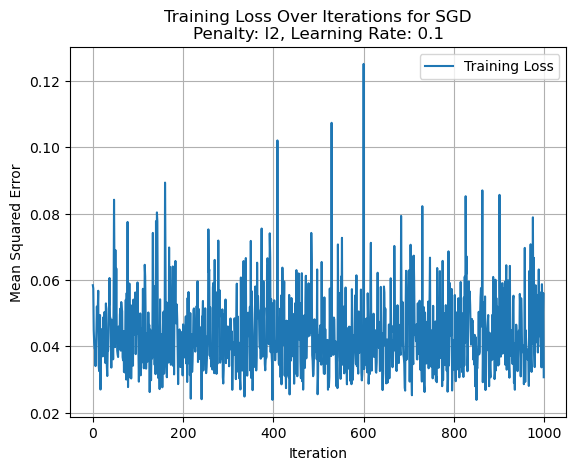

SGD with l2 penalty and learning rate 0.001 Test MSE: 0.028558751472304293


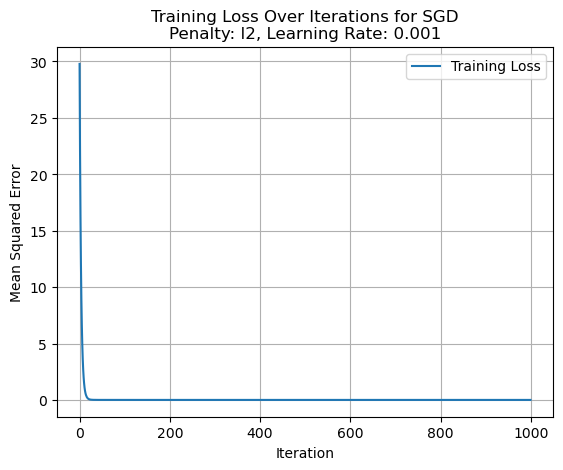

SGD with l1 penalty and learning rate 0.01 Test MSE: 0.07512100802138649


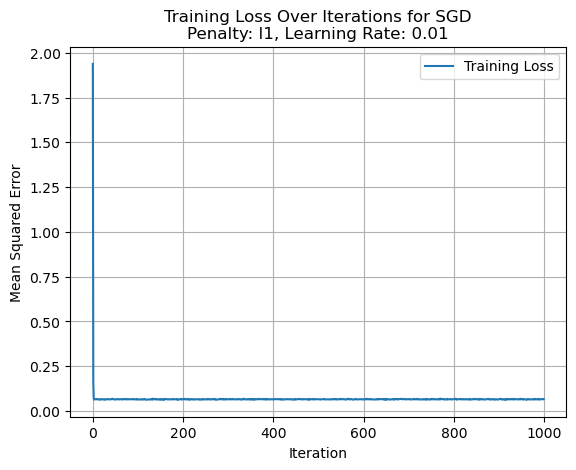

SGD with l1 penalty and learning rate 0.1 Test MSE: 0.06404308275231321


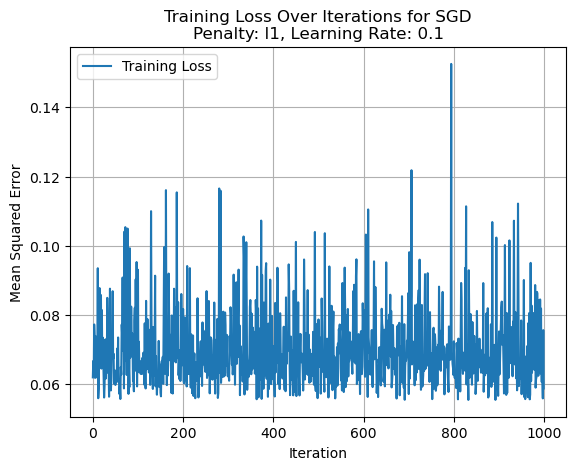

SGD with l1 penalty and learning rate 0.001 Test MSE: 0.07547196838316422


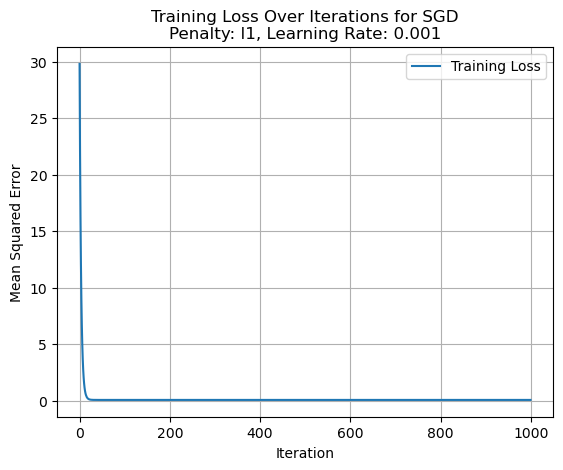

SGD with elasticnet penalty and learning rate 0.01 Test MSE: 0.032101011472614405


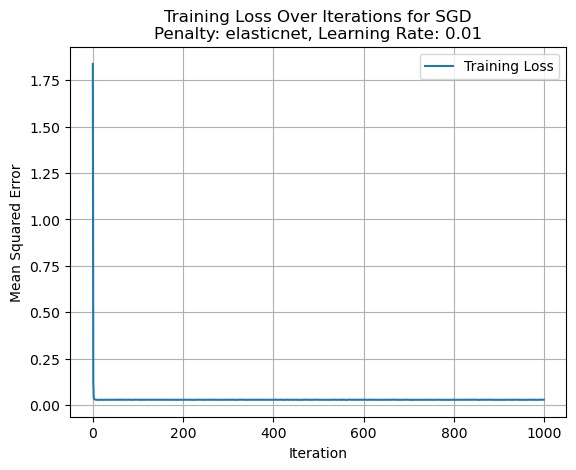

SGD with elasticnet penalty and learning rate 0.1 Test MSE: 0.04291618394170556


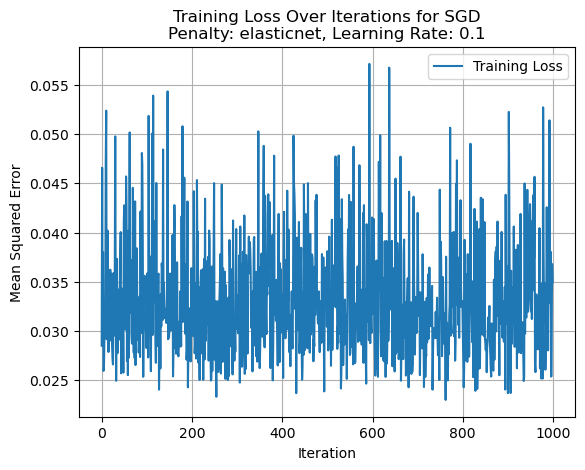

SGD with elasticnet penalty and learning rate 0.001 Test MSE: 0.03248367927360398


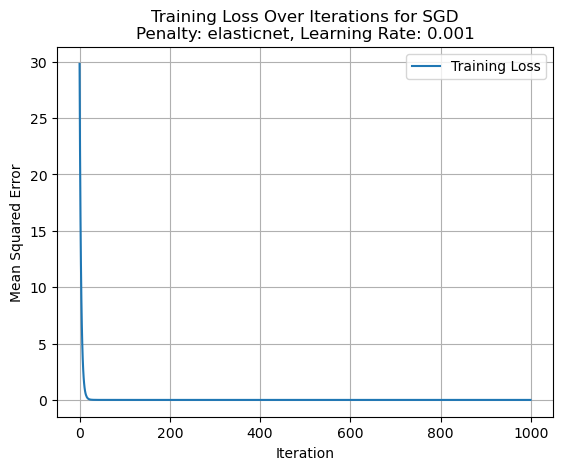

In [2389]:
learning_rates = [0.01, 0.1, 0.001]
penalties = ['l2', 'l1', 'elasticnet']

for penalty in penalties:
    for lr in learning_rates:
        sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=penalty, alpha=0.1,
                           learning_rate='constant', eta0=lr, verbose=0)

        losses = []
        
        for iteration in range(1, 1001):  
            sgd.partial_fit(X_train_scaled, y_train)
            ypred_train = sgd.predict(X_train_scaled)
            train_loss = mean_squared_error(y_train, ypred_train)
            losses.append(train_loss)

        ypred_sgd = sgd.predict(X_test_scaled)
        mse_sgd = mean_squared_error(y_test, ypred_sgd)
        print(f"SGD with {penalty} penalty and learning rate {lr} Test MSE: {mse_sgd}")
        
        plt.figure()
        plt.plot(losses, label=f"Training Loss")
        plt.title(f"Training Loss Over Iterations for SGD\nPenalty: {penalty}, Learning Rate: {lr}")
        plt.xlabel("Iteration")
        plt.ylabel("Mean Squared Error")
        plt.legend()
        plt.grid()
        plt.show()

### Findings- 

### Ridge showed low MSE values and shows effective regularisation which means model generalizes well to unseen data.

### Lasso has higher MSE than ridge both in cross-validation and test datasets.It may be underfitting

### For ElasticNet Regression the MSE values are relatively low, indicating that it balances between L1 and L2 regularization 

# F)Repeat everything from part E with polynomial regression and using SGD. Using validation loss, explore if your model overfits/underfits the data. 

In [2393]:
poly = PolynomialFeatures(degree=2)
Xtrain_poly = poly.fit_transform(X_train_scaled)
Xtest_poly = poly.transform(X_test_scaled)

In [2394]:
poly_models = {
    'Ridge Poly': Ridge(alpha=1),
    'Lasso Poly': Lasso(alpha=0.1),
    'ElasticNet Poly': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

In [2396]:
def normal_equation(X, y):
    X_transpose = np.transpose(X)
    theta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    return theta

for name, model in poly_models.items():
    train_losses = []
    val_losses = []
    
    for train_index, val_index in kf.split(Xtrain_poly):
        X_train_fold, X_val_fold = Xtrain_poly[train_index], Xtrain_poly[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        theta = normal_equation(X_train_fold, y_train_fold)

        y_train_pred = X_train_fold.dot(theta)
        y_val_pred = X_val_fold.dot(theta)
        
        train_loss = mean_squared_error(y_train_fold, y_train_pred)
        val_loss = mean_squared_error(y_val_fold, y_val_pred)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    print(f"{name} Average Training MSE: {np.mean(train_losses)}")
    print(f"{name} Average Validation MSE: {np.mean(val_losses)}")

Ridge Poly Average Training MSE: 1.2073997355781338
Ridge Poly Average Validation MSE: 1.5505411107865215
Lasso Poly Average Training MSE: 1.2073997355781338
Lasso Poly Average Validation MSE: 1.5505411107865215
ElasticNet Poly Average Training MSE: 1.2073997355781338
ElasticNet Poly Average Validation MSE: 1.5505411107865215


In [2397]:
learning_rates = [0.01, 0.1, 0.001]
batch_sizes = [1, 100, 1000]

for batch_size in batch_sizes:
    for lr in learning_rates:
        sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', alpha=0.1, learning_rate='constant', eta0=lr)

        train_losses = []
        val_losses = []
        
        for train_index, val_index in kf.split(X_train_scaled):
            X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            for i in range(0, len(X_train_fold), batch_size):
                end = i + batch_size
                X_batch = X_train_fold[i:end]
                y_batch = y_train_fold.iloc[i:end]

                sgd.partial_fit(X_batch, y_batch)

            y_train_pred = sgd.predict(X_train_fold)
            y_val_pred = sgd.predict(X_val_fold)

            train_loss = mean_squared_error(y_train_fold, y_train_pred)
            val_loss = mean_squared_error(y_val_fold, y_val_pred)

            train_losses.append(train_loss)
            val_losses.append(val_loss)

        print(f"SGD with learning rate {lr} and batch size {batch_size} Average Training MSE: {np.mean(train_losses)}")
        print(f"SGD with learning rate {lr} and batch size {batch_size} Average Validation MSE: {np.mean(val_losses)}")

SGD with learning rate 0.01 and batch size 1 Average Training MSE: 1.9704087100499148
SGD with learning rate 0.01 and batch size 1 Average Validation MSE: 2.2253290339752154
SGD with learning rate 0.1 and batch size 1 Average Training MSE: 0.03560698537339413
SGD with learning rate 0.1 and batch size 1 Average Validation MSE: 0.049940620975741846
SGD with learning rate 0.001 and batch size 1 Average Training MSE: 27.23896385903994
SGD with learning rate 0.001 and batch size 1 Average Validation MSE: 27.609844463131967
SGD with learning rate 0.01 and batch size 100 Average Training MSE: 1.9955209083362024
SGD with learning rate 0.01 and batch size 100 Average Validation MSE: 2.251395709871891
SGD with learning rate 0.1 and batch size 100 Average Training MSE: 0.04048153801343148
SGD with learning rate 0.1 and batch size 100 Average Validation MSE: 0.03598129029182095
SGD with learning rate 0.001 and batch size 100 Average Training MSE: 27.23735551816794
SGD with learning rate 0.001 and 

In [2398]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', alpha=0.1)
sgd.fit(X_train_scaled, y_train)
train_loss = []
for i in range(1, len(sgd.coef_) + 1):  
    ypred_sgd_iter = np.dot(X_train_scaled, sgd.coef_) + sgd.intercept_  
    loss = mean_squared_error(y_train, ypred_sgd_iter)
    train_loss.append(loss)

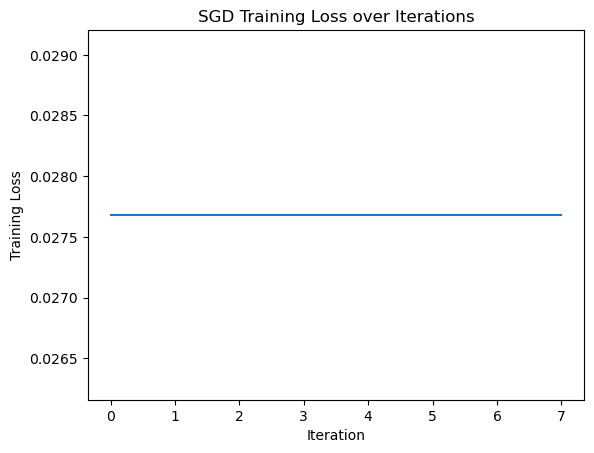

In [2399]:
plt.plot(train_loss)
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('SGD Training Loss over Iterations')
plt.show()

### Ridge Regression is slightly overfitting, but performing well overall.This can be solved by  more regularization tuning, careful feature selection, and adequate training data

# Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance

In [2403]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train_scaled, y_train)  
ypred_ridge = ridge_reg.predict(X_test_scaled)  
mse_ridge = mean_squared_error(y_test, ypred_ridge) 
print(f"Ridge Regression MSE: {mse_ridge}")


Ridge Regression MSE: 0.02082324425542907


### Ridge regression has lowest Test MSE and Cross-Validation MSE and helps in reducing overfitting by penalizing large coefficients

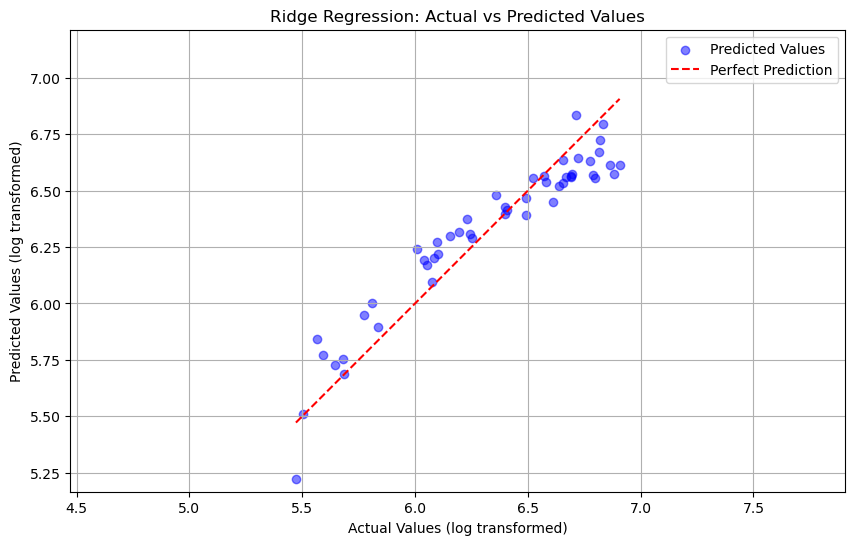

In [2405]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ypred_ridge, color='blue', label='Predicted Values', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Ridge Regression: Actual vs Predicted Values')
plt.xlabel('Actual Values (log transformed)')
plt.ylabel('Predicted Values (log transformed)')
plt.grid()
plt.legend()
plt.axis('equal')  
plt.xlim(min(y_test) - 1, max(y_test) + 1)  
plt.ylim(min(y_test) - 1, max(y_test) + 1)
plt.show()

### For further exploration we can use Ensemble learning methods  such as bagging ad boosting.On top of it we can also create new features capture more complex patterns within the dataset